In [1]:
#exercicio 3.18 - fazer um weibull plot dos dados de teste

from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np


F, a, b, R, mttf, l =symbols('F a b R mttf l')
tempos=[0.4,1,2,5,8,12,25]
freq=[1,3,5,15,20,30,50]
data=np.array(tempos)
ln_data=np.log(data)

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



[0.9949698189134809, 0.9708249496981891, 0.9305835010060363, 0.8098591549295775, 0.6488933601609658, 0.4074446680080483, 0.005030181086519115]
[-5.28977891631317, -3.51967335287434, -2.63187461913410, -1.55639523522880, -0.838203265530209, -0.107752107067350, 1.66625280062900]


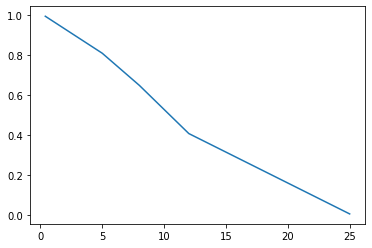

In [2]:



Rlist=[]
Rlist_inv=[]
Rlist_inv_ln=[]
sobreviventes=np.sum(freq)
n=np.sum(freq)
for i in range(len(tempos)):
    #Ri=1-i/10
    Ri=((sobreviventes-freq[i])+0.625)/(n+0.25)
    Rlist.append(Ri)
    inverso=1/Rlist[i]
    Rlist_inv.append(inverso)
    logn_logn_r_inverso=ln(ln(inverso))
    Rlist_inv_ln.append(logn_logn_r_inverso) #inclui ln(ln(1/R(ti)))
    sobreviventes = sobreviventes-freq[i]

print(Rlist)
print(Rlist_inv_ln)
plt.plot(tempos,Rlist)


fitted slope
1.56385590892898
fitted bias
-3.80246145601947


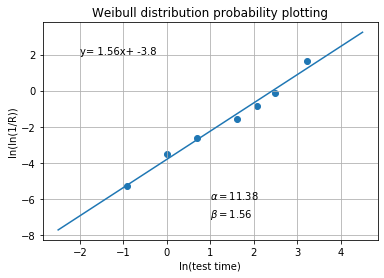

In [4]:

R0368= np.array([0.368])

x_axis = np.array(ln_data)
y_axis = np.array(Rlist_inv_ln)

#regressão linear dos eixos X e Y - eq 2.156 Modarres - Método dos menores quadrados 
x_mean=np.mean(x_axis)
y_mean=np.mean(y_axis)
x_xi=np.subtract(x_axis,x_mean) #xi-x_mean
y_yi=np.subtract(y_axis,y_mean) #yi - y_mean
numerador = np.sum(np.multiply(x_xi,y_yi))
denumerador = np.sum(np.multiply(x_xi,x_xi))
slope= numerador/denumerador
bias = y_mean-slope*x_mean
print('fitted slope')
print(slope)
print('fitted bias')
print(bias)
range_variable_start=-2.5 #definir a faixa de plotagem
range_variable_end=5 #definir a faixa de plotagem conforme a faixa dos dados

def predict(range_variable):
    return slope*range_variable+bias
beta=slope
alfa= exp(-bias/beta)

vector=np.arange(range_variable_start,range_variable_end)
plt.grid(True)
plt.text(1, -6, r'$\alpha=$'+str(round(alfa,2)))
plt.text(1, -7, r'$\beta=$'+str(round(beta,2)))
plt.text(-2, 2, "y= "+str(round(slope,2))+"x + "+str(round(bias,2)))
plt.scatter(ln_data,Rlist_inv_ln)
plt.xlabel('ln(test time)')
plt.ylabel('ln(ln(1/R))')
plt.title('Weibull distribution probability plotting')            
#plt.legend()
#plt.scatter(X_axis,Y_axis, label='data')
plt.plot(vector,predict(vector), label='fitted line')
#plt.plot(vector,R0368)



In [ ]:
print('parâmetros weibull')
print('beta')
print(beta)
print('alfa')
print(alfa)